# **Diabetic Patient Readmission -- EDA**

This dataset was analyzed by numerous Virginia Commonwealth University faculty in a recent research article which is accompanied by feature descriptions. These can be found at https://www.hindawi.com/journals/bmri/2014/781670/tab1/.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
df1 = pd.read_csv('clean_data.csv')
df2 = pd.read_excel('CMS32_DESC_LONG_SHORT_DX.xlsx') #ICD9 diagnoses codes with descriptions

In [3]:
df1.keys()

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [4]:
df1.head(8).T

,0,1,2,3,4,5,6,7
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80)
admission_type_id,6,1,1,1,1,2,3,1
discharge_disposition_id,25,1,1,1,1,1,1,1
admission_source_id,1,7,7,7,7,2,2,7
time_in_hospital,1,3,2,2,1,3,4,5
medical_specialty,Pediatrics-Endocrinology,?,?,?,?,?,?,?


In [5]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


**More cleaning:**<br><br>
UCI Machine Learning Repository Link: https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008<br><br>
Dataset information provided on the UCI website:<br><br>
The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.<br><br>
(1) It is an inpatient encounter (a hospital admission).<br>
(2) It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.<br>
(3) The length of stay was at least 1 day and at most 14 days.<br>
(4) Laboratory tests were performed during the encounter.<br>
(5) Medications were administered during the encounter.<br><br>
The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

In [6]:
df2.sample(10)

,DIAGNOSIS CODE,LONG DESCRIPTION,SHORT DESCRIPTION
1562,1890,"Malignant neoplasm of kidney, except pelvis",Malig neopl kidney
9607,80033,Closed fracture of vault of skull with other a...,Cl skull vlt fx-mod coma
4402,38002,Chronic perichondritis of pinna,Chr perichondritis pinna
13374,E9852,"Injury by hunting rifle, undetermined whether ...",Undet circ-hunting rifle
9315,78559,Other shock without mention of trauma,Shock w/o trauma NEC
13141,E9376,"Mixed sedatives, not elsewhere classified, cau...",Adv eff mix sedative
5480,52551,"Partial edentulism, class I","Part edentulism,class I"
12841,E8784,Other restorative surgery causing abnormal pat...,Abn react-plast surg NEC
11622,95214,T1-T6 level with other specified spinal cord i...,T1-t6 spin cord inj NEC
5266,51289,Other pneumothorax,Other pneumothorax


In [7]:
print('diag_1:', df2['DIAGNOSIS CODE'].isin(df1.diag_1).sum(), 'matches out of', df1.diag_1.nunique())
print('diag_2:', df2['DIAGNOSIS CODE'].isin(df1.diag_2).sum(), 'matches out of', df1.diag_2.nunique())
print('diag_3:', df2['DIAGNOSIS CODE'].isin(df1.diag_3).sum(), 'matches out of', df1.diag_3.nunique())

diag_1: 48 matches out of 717
diag_2: 55 matches out of 749
diag_3: 57 matches out of 790


**Noted in the article: The initial dataset was extracted under the stipulation that the patient has *some record* of a diabetes mellitus diagnosis (ICD9: 250.xx) recorded in hospitals' Electronic Health Records (EHR).**

In [8]:
df1_numeric = df1[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']]
df1_numeric.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
time_in_hospital,1,3,2,2,1,3,4,5,13,12,9,7,7,10,1
num_lab_procedures,41,59,11,44,51,31,70,73,68,33,47,62,60,55,49
num_procedures,0,0,5,1,0,6,1,0,2,3,2,0,0,1,5
num_medications,1,18,13,16,8,16,21,12,28,18,17,11,15,31,2
number_outpatient,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
number_emergency,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
number_inpatient,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
number_diagnoses,1,9,6,7,5,9,7,8,8,8,9,7,8,8,8


In [9]:
df1_cats = df1.drop(columns=['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses'])
df1_cats.head(8).T

,0,1,2,3,4,5,6,7
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80)
admission_type_id,6,1,1,1,1,2,3,1
discharge_disposition_id,25,1,1,1,1,1,1,1
admission_source_id,1,7,7,7,7,2,2,7
medical_specialty,Pediatrics-Endocrinology,?,?,?,?,?,?,?
diag_1,250.83,276,648,8,197,414,414,428


In [10]:
yes_hba1c = df1[df1.A1Cresult != 'None']
yes_hba1c.readmitted.value_counts()

NO     9542
>30    5800
<30    1676
Name: readmitted, dtype: int64

In [11]:
no_hba1c = df1[df1.A1Cresult == 'None']
no_hba1c.readmitted.value_counts()

NO     45322
>30    29745
<30     9681
Name: readmitted, dtype: int64

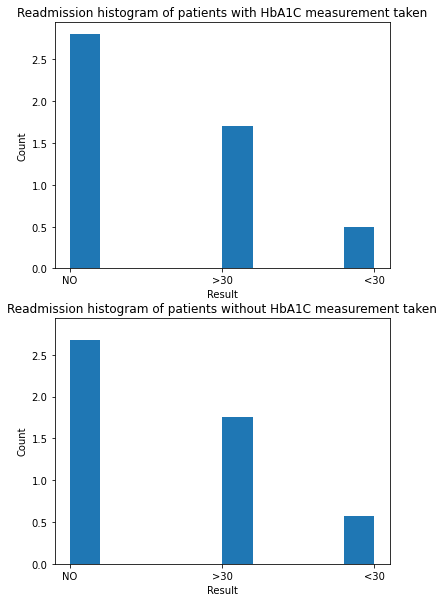

In [12]:
fig, ax = plt.subplots(2, 1, sharey=True)
ax[0].hist(yes_hba1c.readmitted, density=True)
ax[1].hist(no_hba1c.readmitted, density=True)
ax[0].set_title('Readmission histogram of patients with HbA1C measurement taken')
ax[1].set_title('Readmission histogram of patients without HbA1C measurement taken')
for i in [0,1]:
    ax[i].set_xlabel('Result')
    ax[i].set_ylabel('Count')
plt.subplots_adjust(bottom=-1);

**We can see here that the readmission rates are slightly disproportionately higher among those patients who have not had an HbA1C measurement taken vs. those who have had this measurement taken.**<br><br> This is in line with the conclusions made by the aforementioned academic research article, which state that *\"With respect to readmission and taken as a whole without adjusting for covariates, measurement of HbA1c was associated with a significantly reduced rate of readmission"*

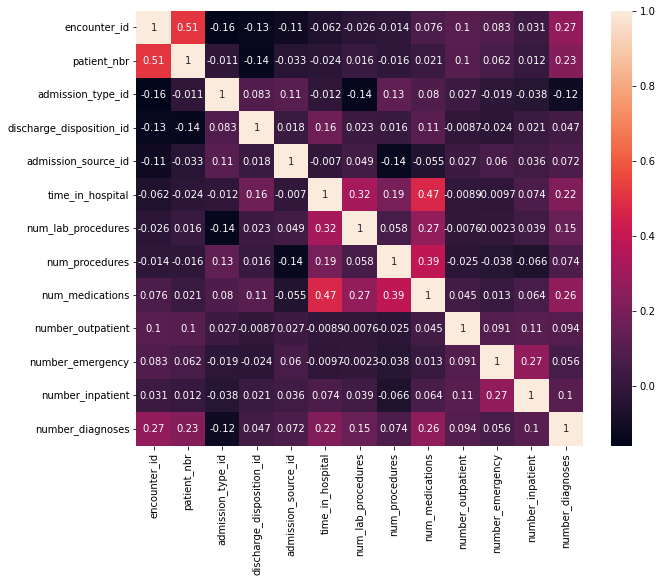

In [13]:
df1_corr = df1.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(df1_corr, annot=True);

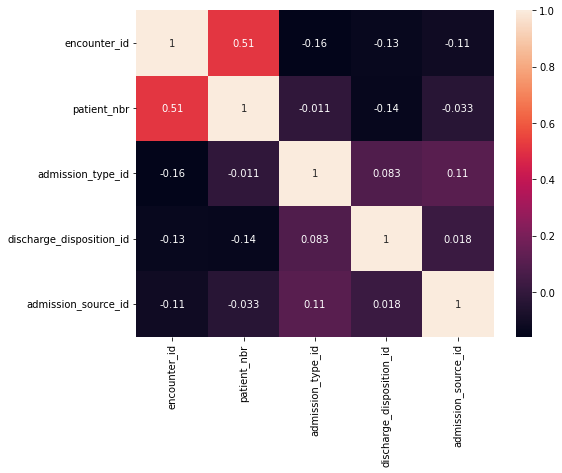

In [14]:
df1_cats_corr = df1_cats.corr()
plt.subplots(figsize=(8,6))
sns.heatmap(df1_cats_corr, annot=True);

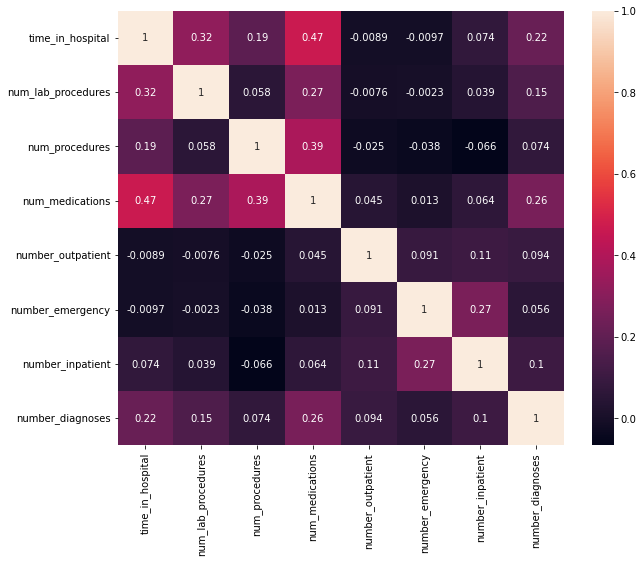

In [15]:
df1_numeric_corr = df1_numeric.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(df1_numeric_corr, annot=True);

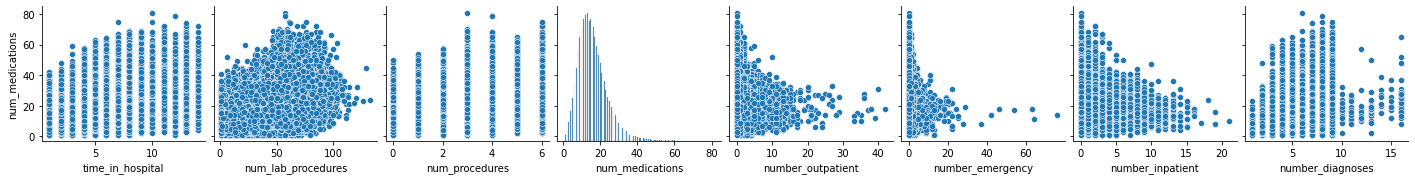

In [22]:
sns.pairplot(df1_numeric, y_vars=['num_medications']);

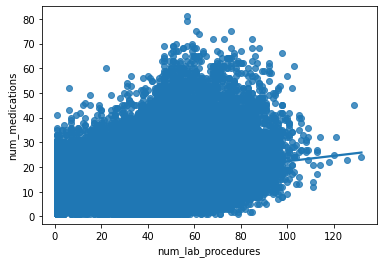

In [24]:
sns.regplot(x='num_lab_procedures',y='num_medications', data=df1_numeric);

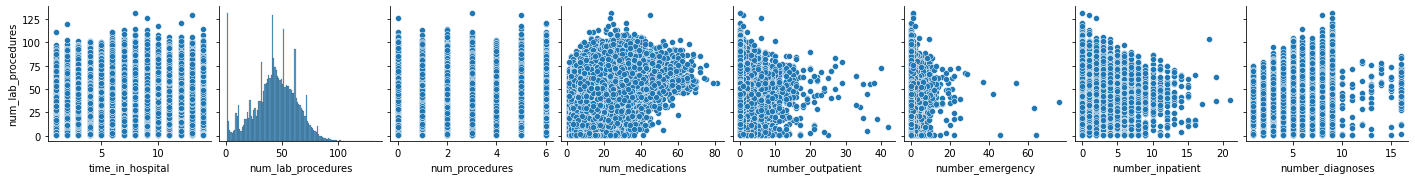

In [18]:
sns.pairplot(df1_numeric, y_vars=['num_lab_procedures']);

From the article:<br> "The preliminary dataset contained multiple inpatient visits for some patients and the observations could not be considered as statistically independent, an assumption of the logistic regression model. We thus used only one encounter per patient; in particular, we considered only the first encounter for each patient as the primary admission and determined whether or not they were readmitted within 30 days. Additionally, we removed all encounters that resulted in either discharge to a hospice or patient death, to avoid biasing our analysis."

0     67630
1     19521
2      7566
3      3411
4      1622
5       812
6       480
7       268
8       151
9       111
10       61
11       49
12       34
13       20
14       10
15        9
16        6
19        2
17        1
21        1
18        1
Name: number_inpatient, dtype: int64


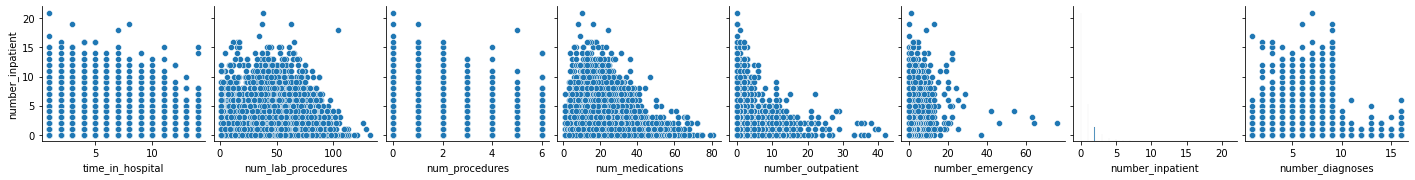

In [19]:
print(df1_numeric.number_inpatient.value_counts()) # No. of recorded inpatient visits in the year prior to the recorded encounter
sns.pairplot(df1_numeric, y_vars=['number_inpatient']);

Further observations made in the df1.html pandas-profiling profile:<br>
- 'time_in_hospital' distribution is right-tailed, with a range of 1-14 (days) and a mean of 4.40.
- 'payer_code' contains 39.6% '?'s. -- This column is removed to avoid errors.
- 'medical_specialty' contains 49.1% '?'s. -- This column is kept, but imputed 'missing' for '?'.
- 'num_lab_procedures' has a fairly normal distribution, though 1 procedure is the most frequent at 3.2% frequency with 43 procedures at 2.8% as the second most-frequent. The distribution has a mean of 43.10 and a range of 1-132.
- 'num_procedures' distribution is right-tailed, with a 'bump' at the max value of 6.
- 'num_medications' distribution is right-tailed, with a range of 1-81 and mean of 16.02.
- 'diag_' columns contain a high number of ICD-9 codes starting with 428, 276, 427, 250, and 401.
- 'number_diagnoses' is particularly interesting, with 48.6% of values at 9, a range of 1-16, and a mean of 7.42.
- 'A1Cresult' is 83.3% 'None', meaning the vast majority of these encounters do not include the taking of an HbA1c measurement.
- 'examide' and 'citoglipton' medications were unchanged across the dataset and will therefore be dropped in our 'clean' dataset.
- 'insulin' contains 46.6% 'No', indicating ~47% of the encounters do not involve patients who are actively taking insulin.
- 'change' column contains 53.8% 'No', so a slight majority of these encounters involve patients whose diabetes medication is unchanged (dosage or generic name) afterwards.
- 'diabetesMed' column shows 77.0% of encounters involve a diabetes medication prescription.